# Multivariate Linear Regression

## Car Insurance Premium Analysis

This notebook analyses the relationship between various factors and car insurance premiums using multivariate regression. We'll explore the data, create visualisations, and build a predictive model.

In [39]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set style for better visualisations
sns.set_theme()

In [40]:
# Load the dataset
df = pd.read_csv('car_insurance.csv')

# Display first few rows
print("First few rows of the dataset:")
display(df.head())

# Display dataset information
print("\nDataset information:")
display(df.info())

# Display summary statistics
print("\nSummary statistics:")
display(df.describe())

First few rows of the dataset:


,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
0,56,32,4,17,2002,23,488.35
1,46,19,0,21,2025,0,486.15
2,32,11,4,15,2020,5,497.55
3,60,0,4,19,1991,34,498.35
4,25,7,0,13,2005,20,495.55



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Driver Age                 1000 non-null   int64  
 1   Driver Experience          1000 non-null   int64  
 2   Previous Accidents         1000 non-null   int64  
 3   Annual Mileage (x1000 km)  1000 non-null   int64  
 4   Car Manufacturing Year     1000 non-null   int64  
 5   Car Age                    1000 non-null   int64  
 6   Insurance Premium ($)      1000 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 54.8 KB


None


Summary statistics:


,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.575000,14.759000,2.5680,17.933000,2007.637000,17.363000,493.742250
std,13.765677,10.544292,1.6989,4.410665,10.363331,10.363331,5.909689
min,18.000000,0.000000,0.0000,11.000000,1990.000000,0.000000,477.050000
25%,30.000000,6.000000,1.0000,14.000000,1999.000000,8.000000,489.487500
50%,42.000000,13.000000,3.0000,18.000000,2008.000000,17.000000,493.950000
75%,53.000000,23.000000,4.0000,22.000000,2017.000000,26.000000,498.312500
max,65.000000,40.000000,5.0000,25.000000,2025.000000,35.000000,508.150000


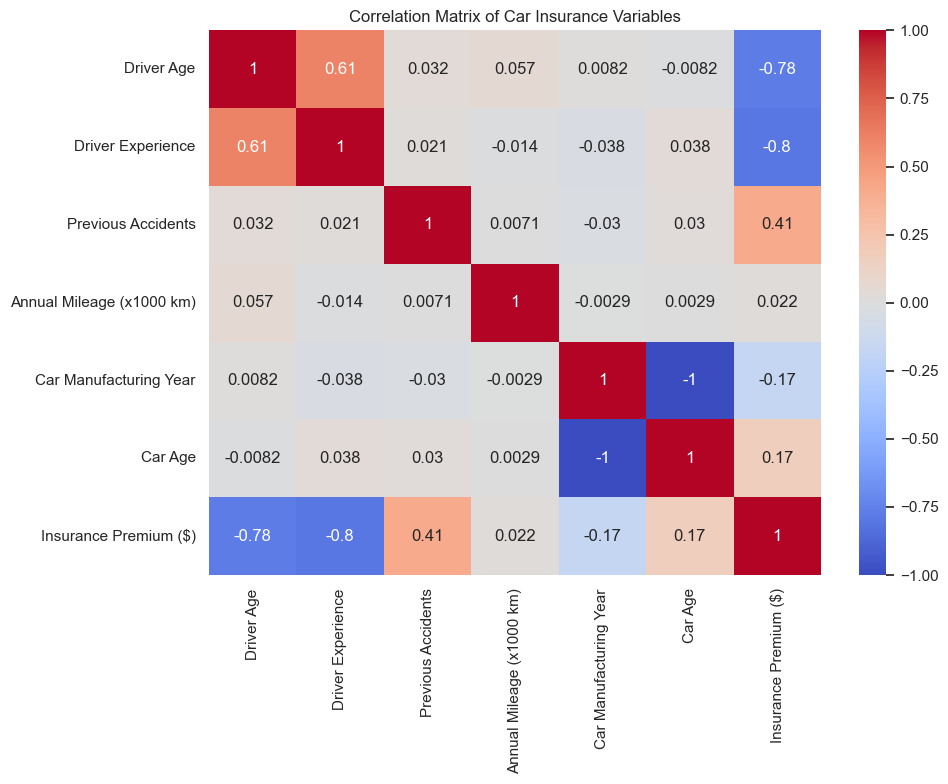


Pairplot of key variables:


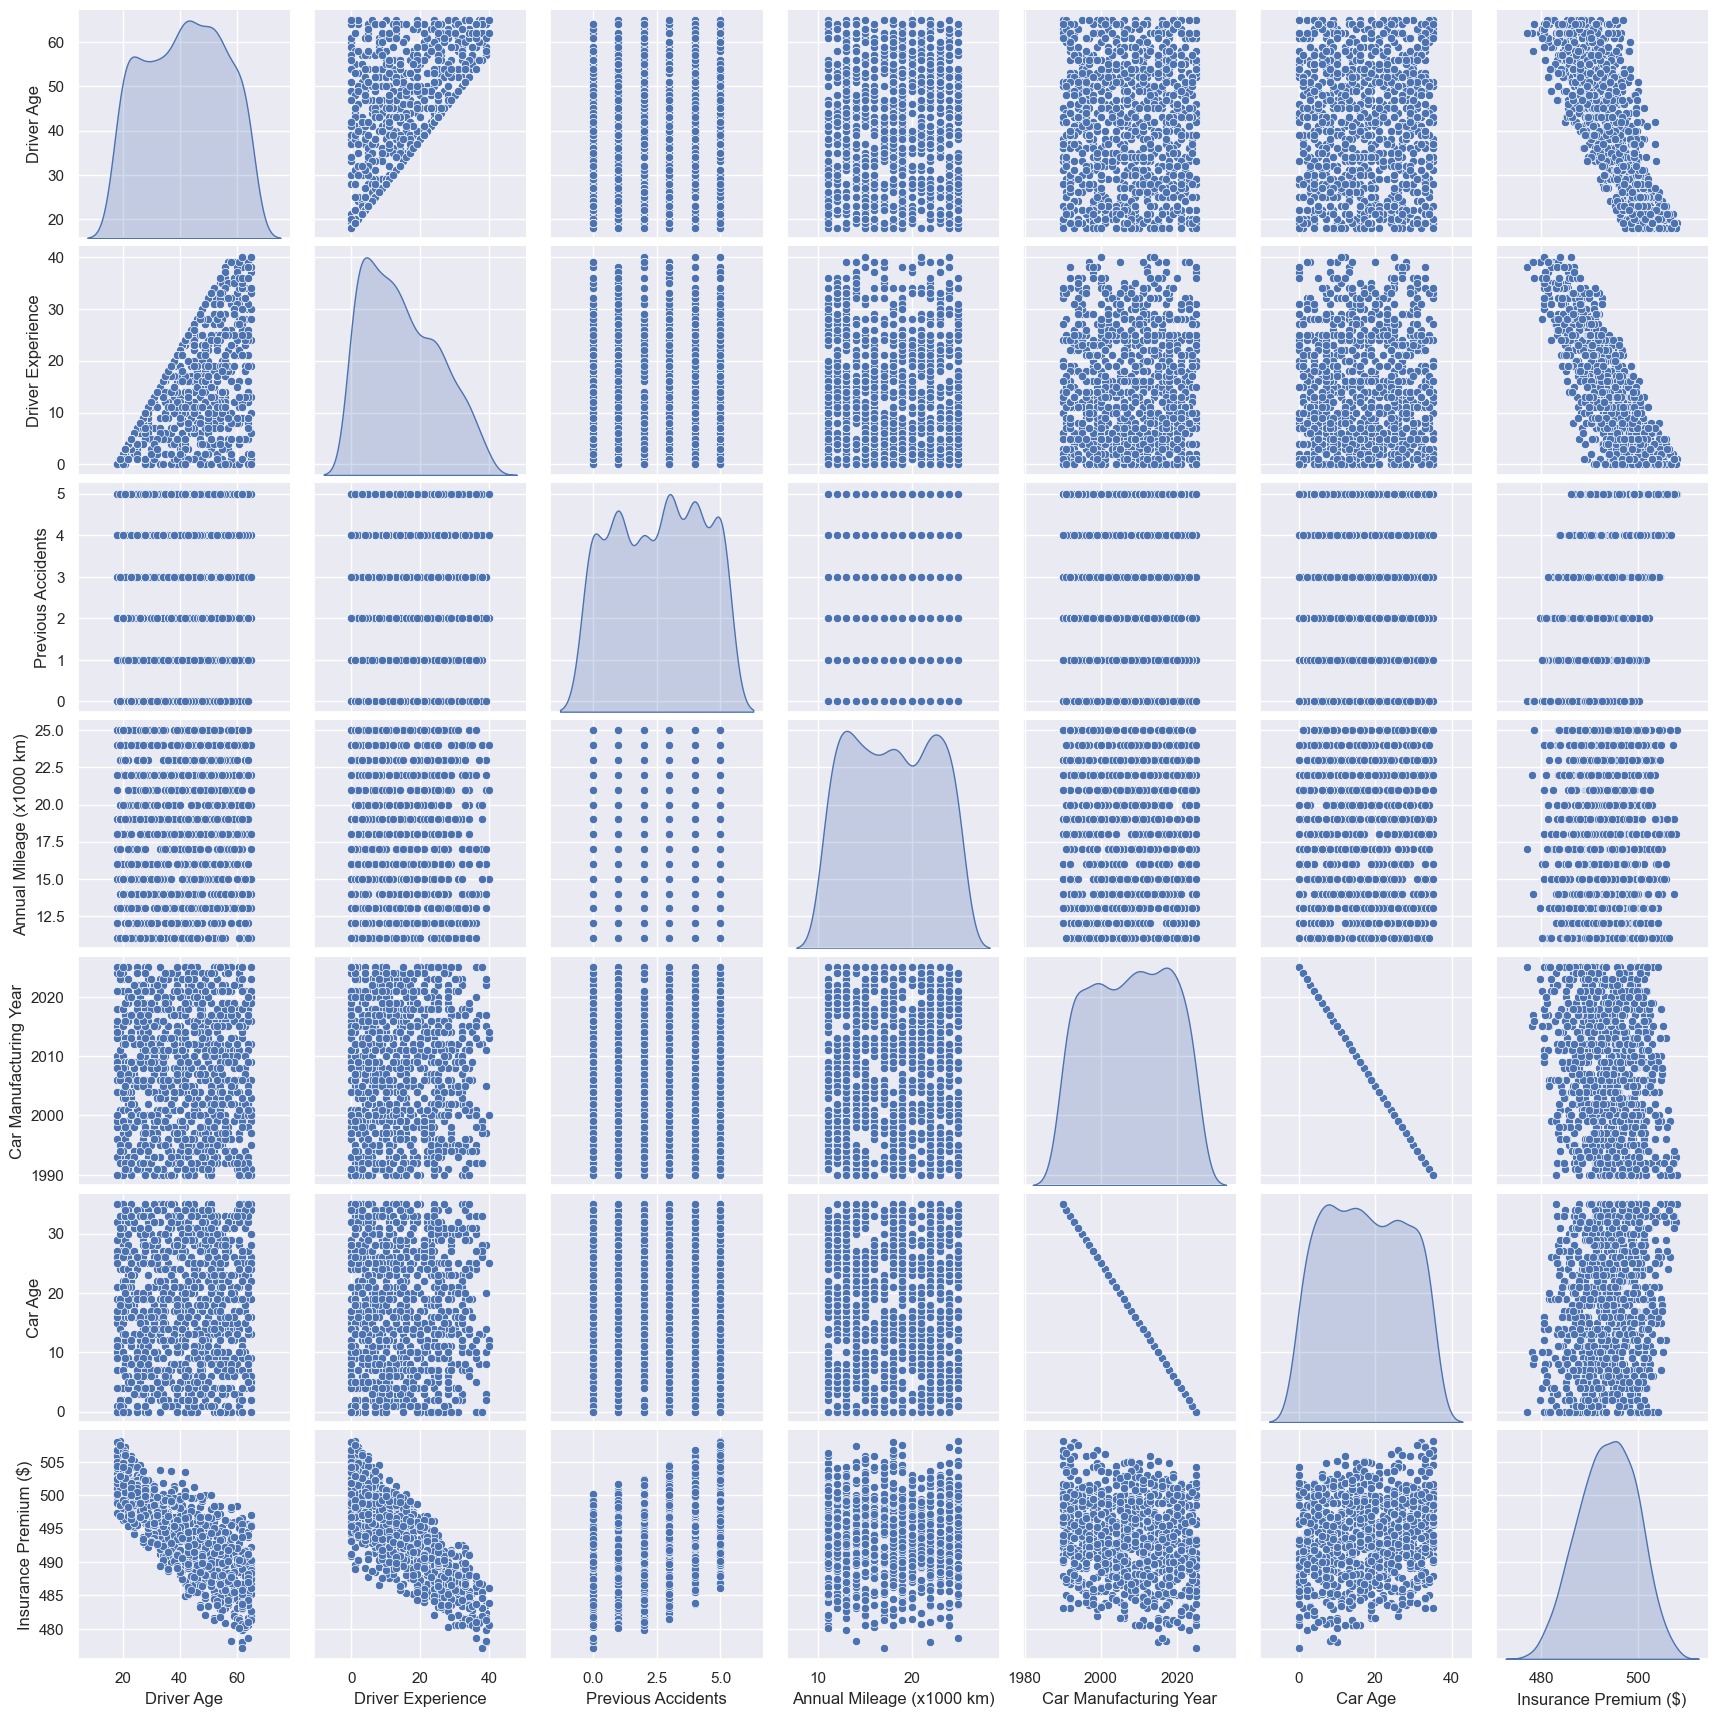

In [41]:
# Create correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Car Insurance Variables')
plt.tight_layout()
plt.show()

# Create pairplot for key variables
print("\nPairplot of key variables:")
sns.pairplot(df, diag_kind='kde')
plt.show()

In [42]:
# Separate features and target variable
X = df.drop('Insurance Premium ($)', axis=1)
y = df['Insurance Premium ($)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the split data
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (800, 6)
Testing set shape: (200, 6)


In [43]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Display feature coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Coefficients:")
display(coefficients.sort_values('Coefficient', ascending=False))

Mean Squared Error: 0.00
R-squared Score: 1.00

Feature Coefficients:


,Feature,Coefficient
2,Previous Accidents,1.50
3,Annual Mileage (x1000 km),0.05
5,Car Age,0.05
4,Car Manufacturing Year,-0.05
0,Driver Age,-0.20
1,Driver Experience,-0.30


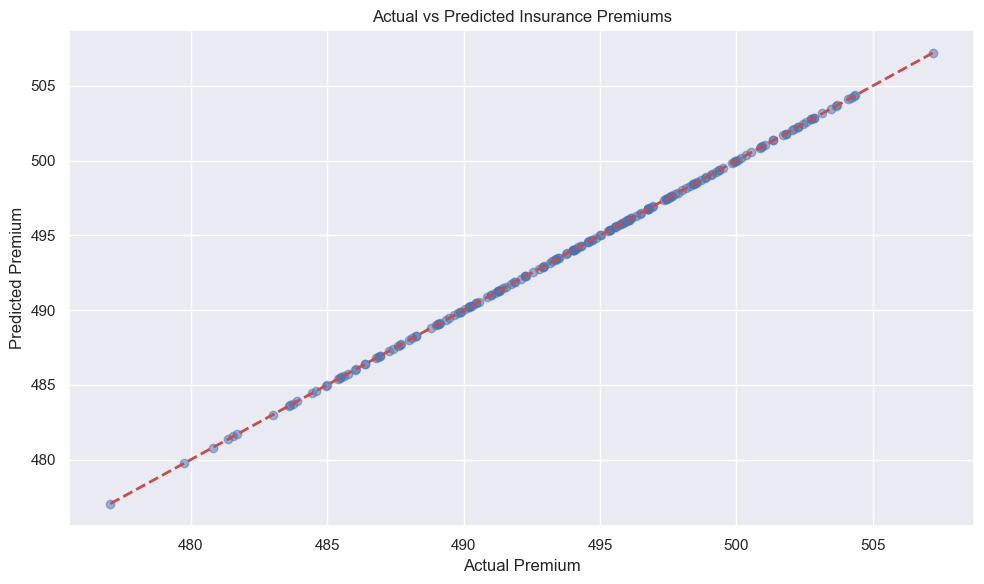

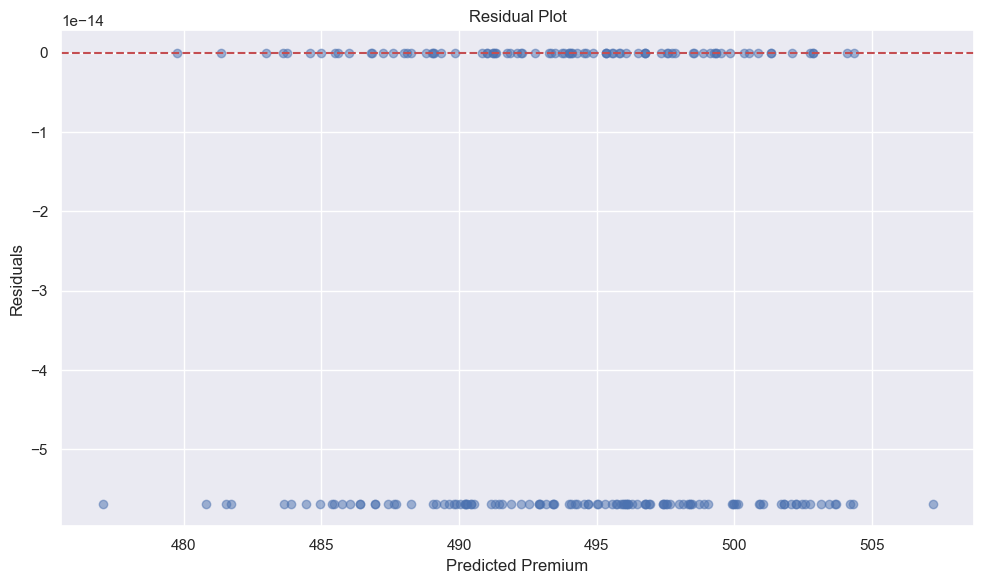

In [44]:
# Create actual vs predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Premium')
plt.ylabel('Predicted Premium')
plt.title('Actual vs Predicted Insurance Premiums')
plt.tight_layout()
plt.show()

# Create residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Premium')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

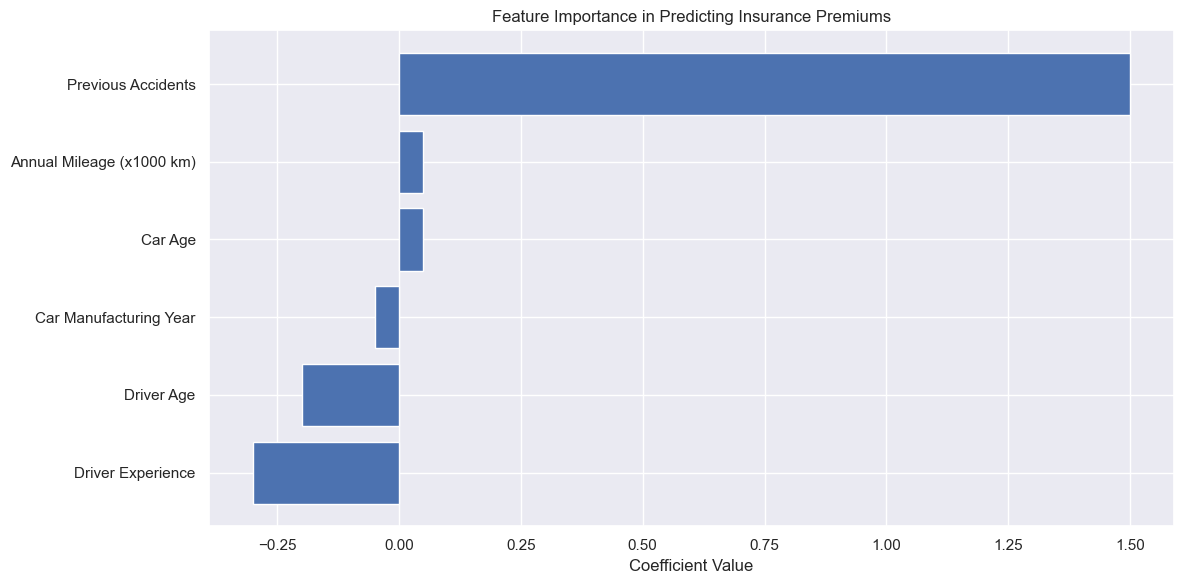


Interpretation of Coefficients:
Driver Experience: decreases premium by $0.30 per unit
Driver Age: decreases premium by $0.20 per unit
Car Manufacturing Year: decreases premium by $0.05 per unit
Car Age: increases premium by $0.05 per unit
Annual Mileage (x1000 km): increases premium by $0.05 per unit
Previous Accidents: increases premium by $1.50 per unit


In [45]:
# Create bar plot of feature coefficients
plt.figure(figsize=(12, 6))
coefficients = coefficients.sort_values('Coefficient', ascending=True)
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Predicting Insurance Premiums')
plt.tight_layout()
plt.show()

# Print interpretation of coefficients
print("\nInterpretation of Coefficients:")
for _, row in coefficients.iterrows():
    effect = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"{row['Feature']}: {effect} premium by ${abs(row['Coefficient']):.2f} per unit")

## Conclusion

This analysis has shown the relationships between various factors and car insurance premiums. The multivariate regression model provides insights into how each factor contributes to the final premium amount. Key findings include:

1. The model's performance metrics (R-squared and MSE) indicate how well it fits the data
2. The feature coefficients show the relative importance of each factor
3. The visualisations help understand the relationships between variables

The model can be used to predict insurance premiums for new cases and understand how different factors influence the final premium amount.